# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [29]:
#install spacy in the current conda environment
!pip install spacy


In [30]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.6 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
%pip install matplotlib
import matplotlib.pyplot as plt

import numpy as np

Note: you may need to restart the kernel to use updated packages.


### Problem 1 and example: common words in the Michigan subreddit

In [32]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [33]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey but the sammies are pretty big",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like their popcorn chicken and crispy rice appetizers!,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and what type of vibe you are looking for. There are a lot of options.,I-696,1
4,4,2024-09-04 14:32:17,1,"You can book completely enclosed private study rooms in Shapiro, just go to the library website. AFAIK, there aren’t places in Hatcher (unless you have special access to certain areas) where you can privately speak out loud on a call because even the private carrels and group study areas are open at the top",sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of individuals.,Own-Resident-3837,-1


In [34]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [35]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [36]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [37]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [38]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [39]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [40]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

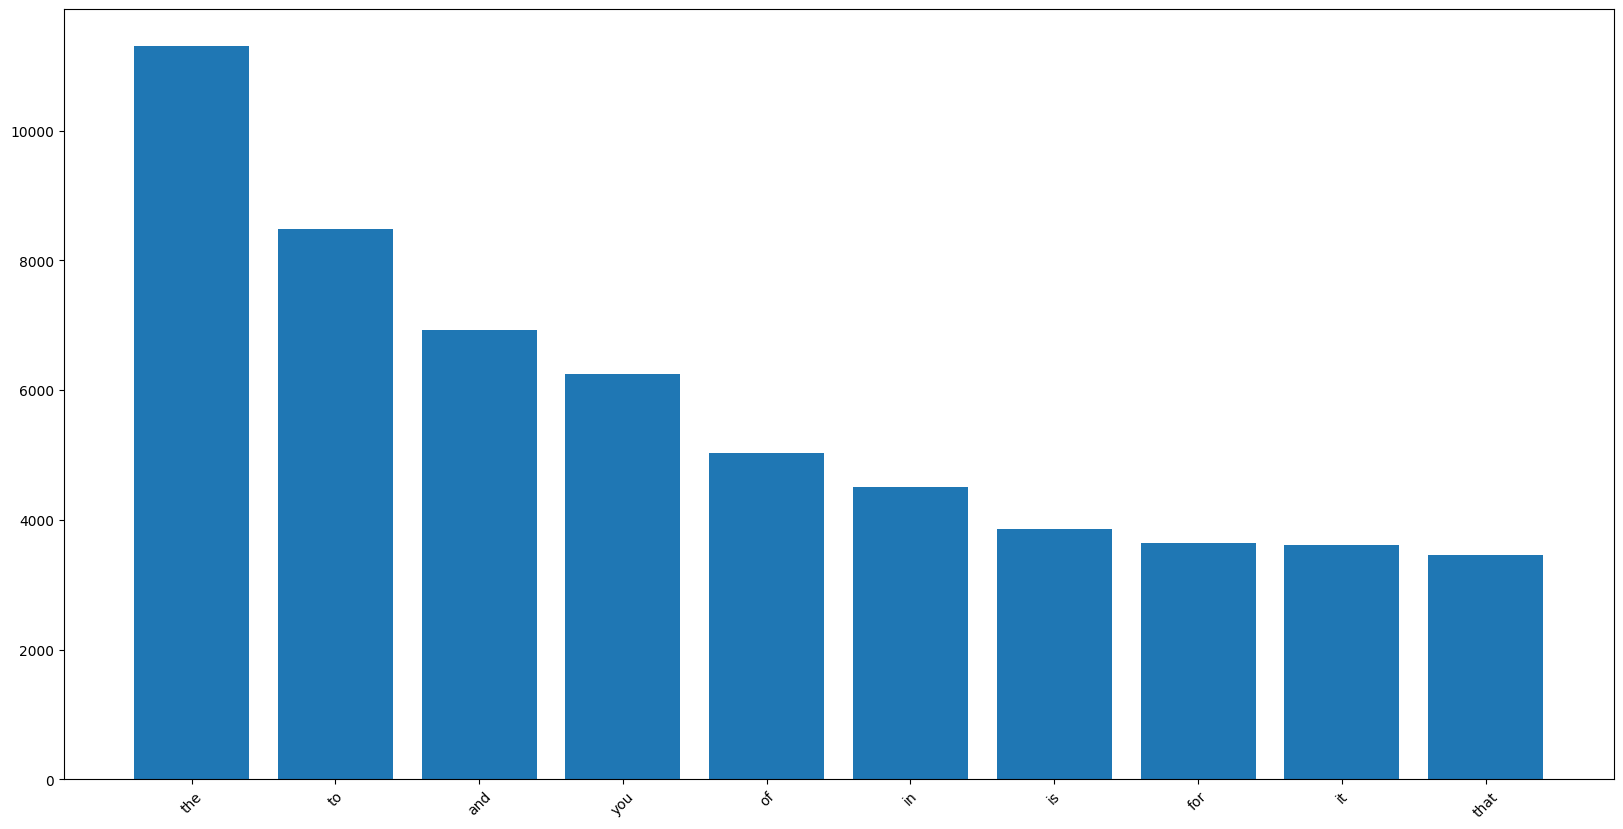

In [16]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: I notice that this data is right skewed. The words in this plot are all very common filler words used to make sense of sentences, with the most common word being "the". This plot is useful for studying the community because it shows us what types of words are the most common.

#### Lemmatization and stopword removal

In [42]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [43]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [44]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [45]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [46]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [47]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

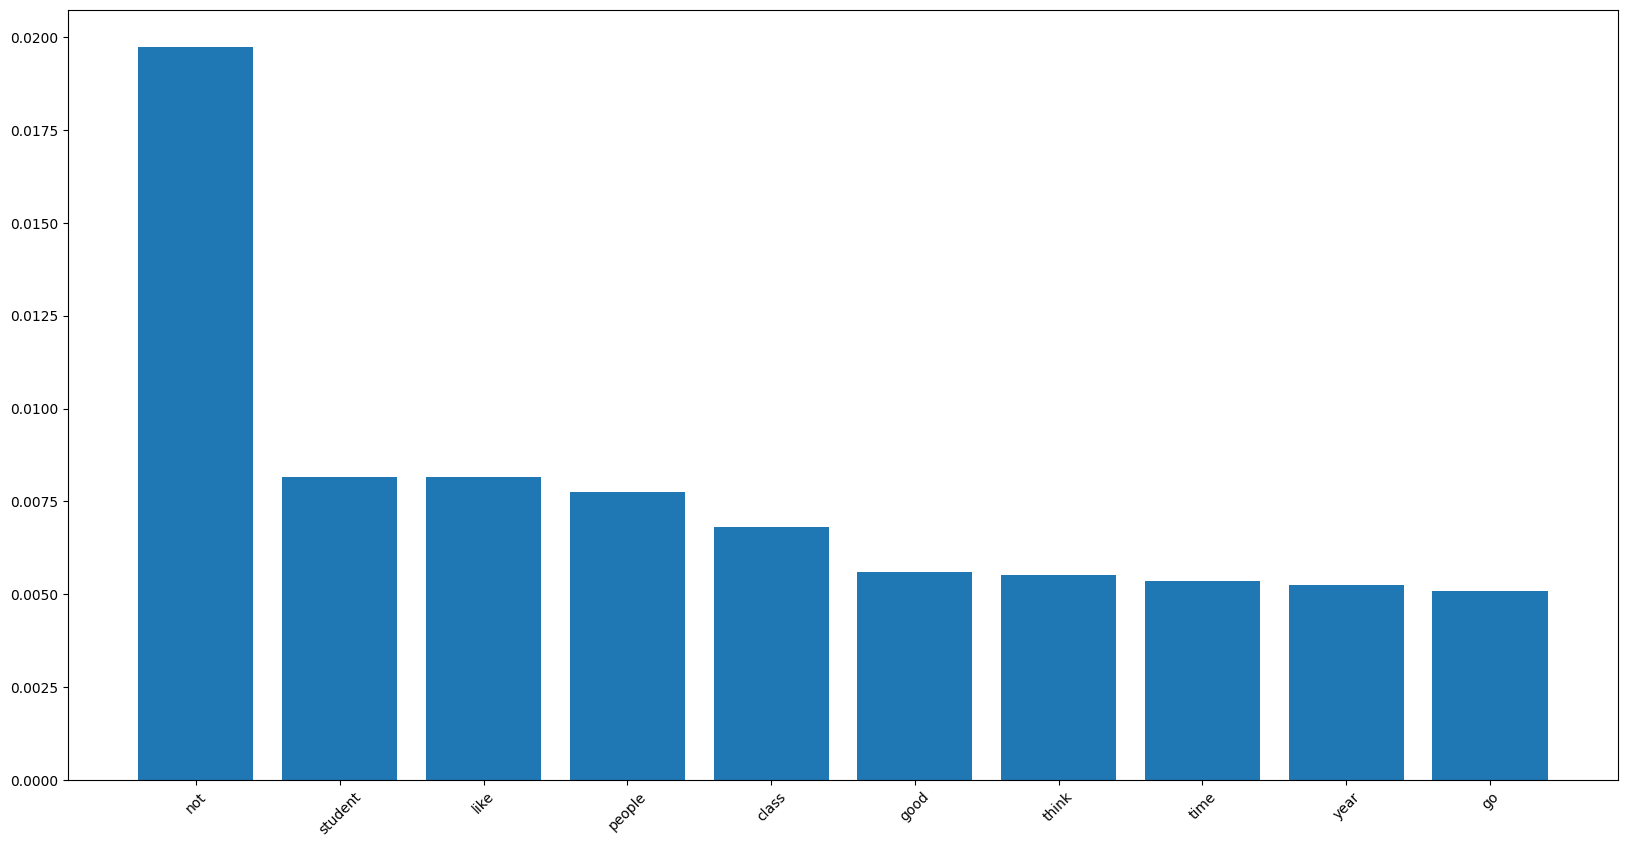

In [ ]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [48]:
#pandas allows us to access specific words in the series using the index
word_counts["student"]

0.008162730202101749

In [49]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

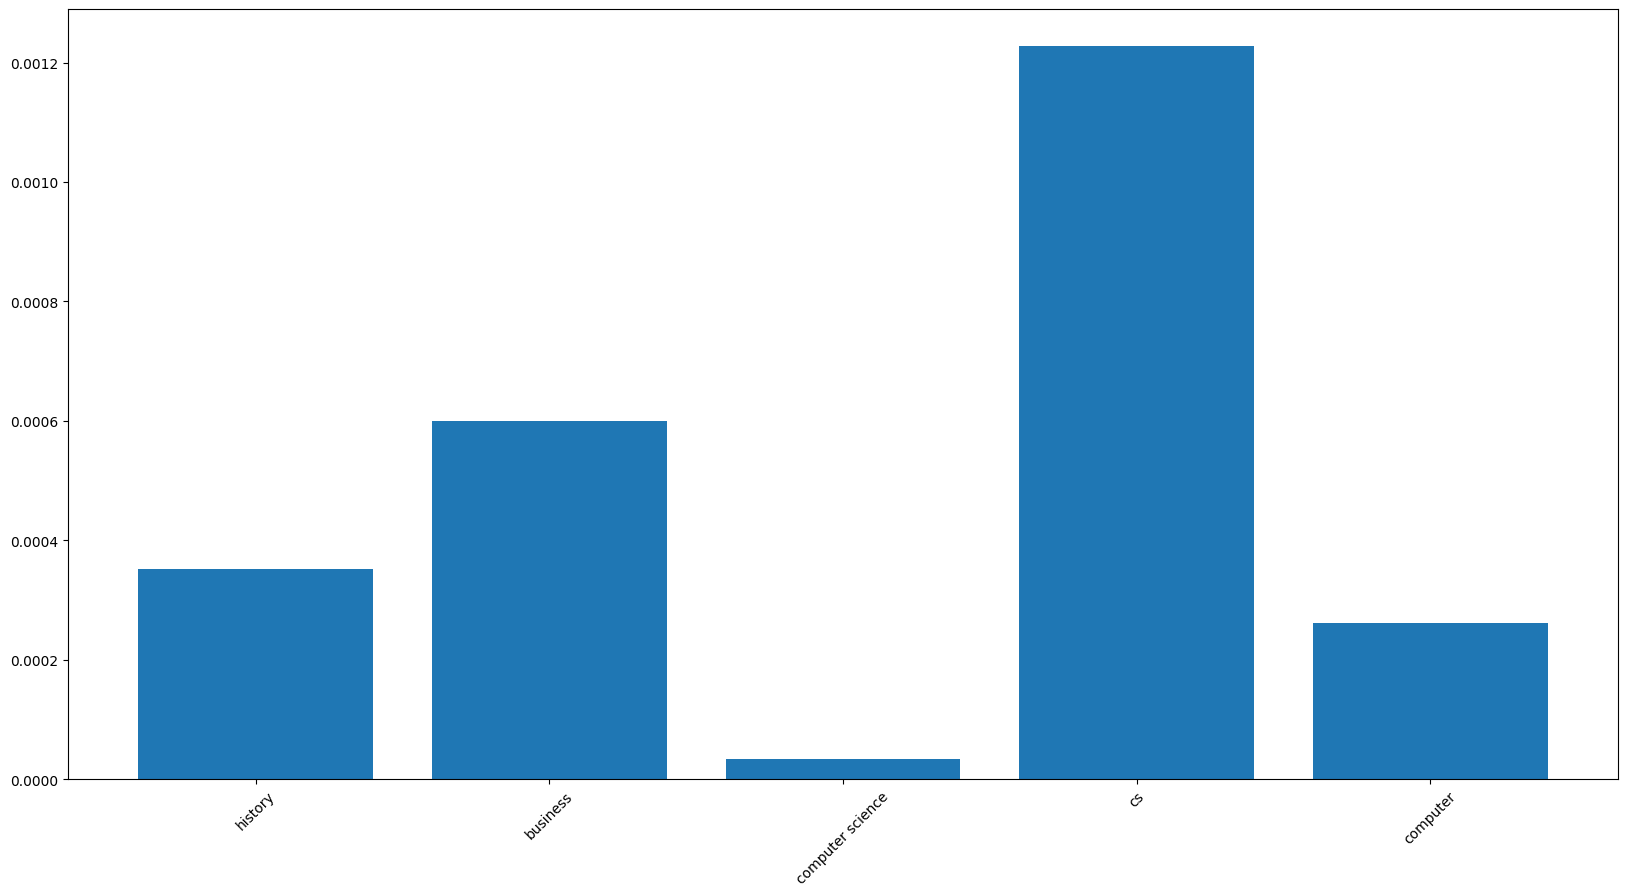

In [ ]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [ ]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

In [50]:
plot_list2=word_counts[["data", "school", "smart", "class", "read"]]
plot_list2

data      0.000173
school    0.003802
smart     0.000179
class     0.006817
read      0.000683
dtype: float64

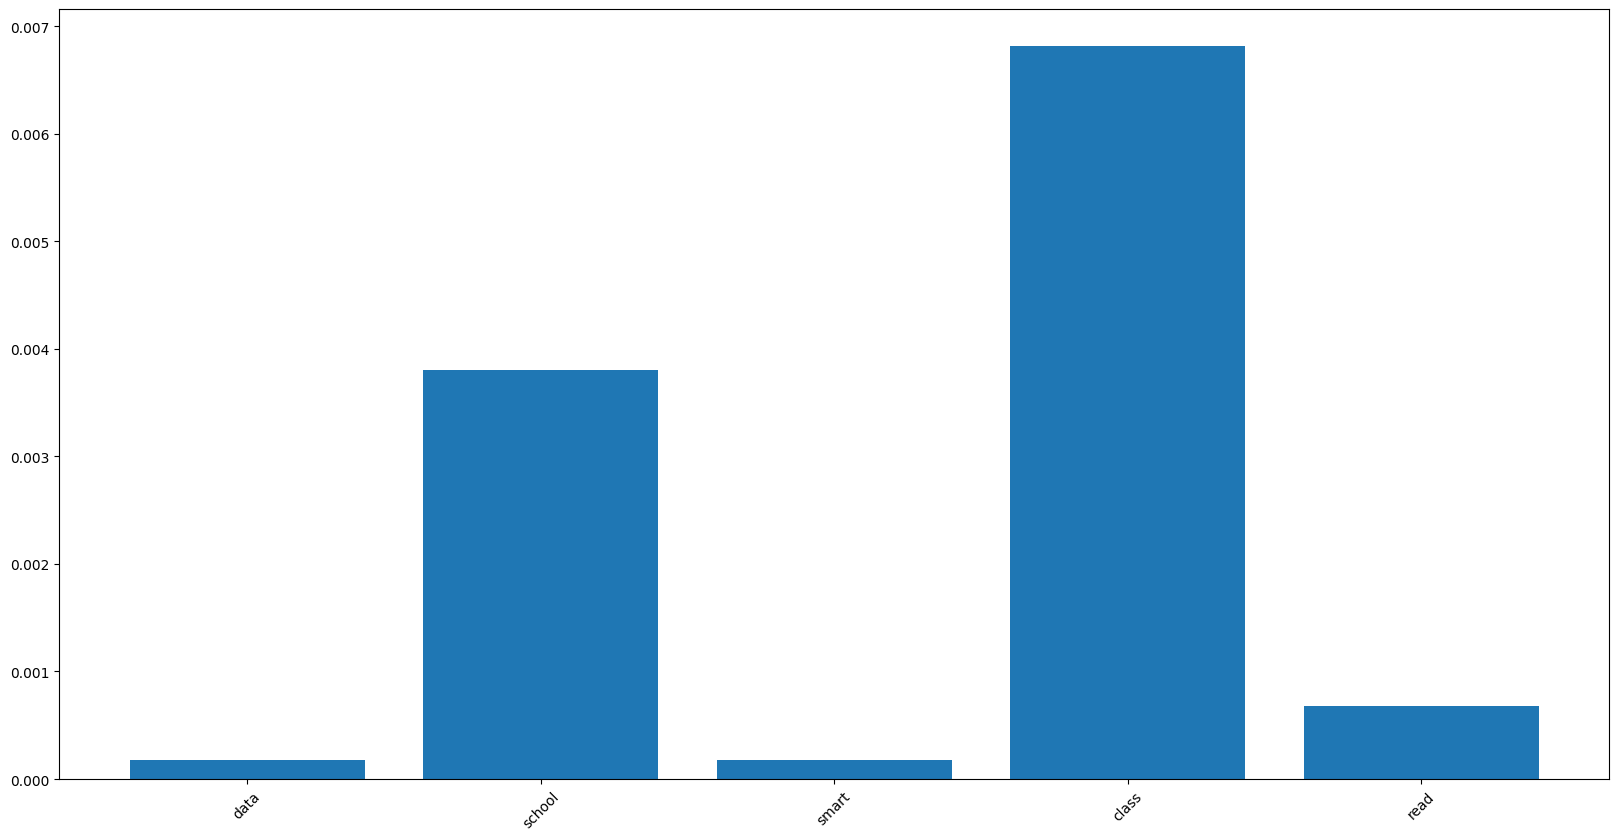

In [51]:

plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [52]:
uiuc=pd.read_csv("uiuc.csv")


### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [53]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [54]:
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

mich = mich.sample(n=4725, random_state=42)
uiuc['label'] = 1
mich['label'] = 0

data = pd.concat([uiuc, mich])

In [55]:
nlp = spacy.load("en_core_web_sm")

def clean(text):
    text = ' '.join(text.split())  # Remove newlines & extra spaces
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])  # Remove punctuation
    return text

data['cleaned_text'] = data['text'].astype(str).apply(clean)

def lemmatize(text):
    doc = nlp(text)  # Use spaCy NLP model
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    return ' '.join(tokens)

data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

In [56]:
# Create a Bag of Words representation using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['lemmatized_text'])
y = data['label'].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [57]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.716931216931217


#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 

The accuracy of the model is 0.717. It is better than the previous model. The accuracy has changed because the model has been trained on a different dataset.

#### Part 3: Examine the top features of your model using the following code

In [ ]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


In [58]:

X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

coefficients = pd.DataFrame({'feature': X_df.columns, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)

top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)
print(top_10_positive)
print(top_10_negative)


         feature  coefficient
11684       uiuc     2.934206
5603    illinois     2.311009
9690         rso     2.305132
4612    grainger     1.957294
1709   champaign     1.863542
11960     urbana     1.786062
2634    danville     1.777098
5598      illini     1.755928
6398         las     1.697691
4642       green     1.660059
        feature  coefficient
9661       ross    -1.701329
11704        um    -1.714726
12209  waitlist    -1.718775
6767        lsa    -1.747283
6968      mcard    -1.757311
3374        eec    -2.006798
11234     texas    -2.083463
11712     umich    -2.196973
4214     fresno    -2.487223
7133   michigan    -2.749428


examine these words and see if they make sense. Do they differentiate UIUC from another university?

I think the positive words make sense because they are words that are associated with UIUC such as "illinois", "engineering", "uiuc", etc. The negative words are words that are associated with Michigan such as "umich", "michigan", "ann", etc. These words make sense because they are words that are associated with the respective universities.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [ ]:

!pip install gensim

In [ ]:
!pip install numpy gensim

In [59]:

#train a lda topic model with gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

# Define the variable X
X = bag_of_words

#convert bow X into a gensim corpus
corpus = Sparse2Corpus(X, documents_columns=False)

# Step 3: Create a dictionary from the vectorizer's vocabulary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [60]:
corpus

In [21]:
#train the lda model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=20)

#show the topics
lda_model.print_topics()

[(0,
  '0.050*"the" + 0.029*"of" + 0.026*"to" + 0.024*"and" + 0.022*"you" + 0.018*"are" + 0.017*"is" + 0.016*"for" + 0.016*"in" + 0.015*"that"'),
 (1,
  '0.033*"the" + 0.029*"is" + 0.025*"it" + 0.017*"texas" + 0.015*"to" + 0.015*"for" + 0.014*"but" + 0.014*"that" + 0.013*"and" + 0.011*"bc"'),
 (2,
  '0.022*"to" + 0.022*"you" + 0.019*"for" + 0.017*"the" + 0.017*"and" + 0.015*"housing" + 0.013*"food" + 0.013*"bio" + 0.012*"tbh" + 0.012*"pm"'),
 (3,
  '0.032*"awesome" + 0.028*"central" + 0.025*"please" + 0.018*"earlier" + 0.015*"fries" + 0.014*"wait" + 0.010*"north" + 0.009*"tho" + 0.009*"guys" + 0.009*"wtf"'),
 (4,
  '0.033*"the" + 0.026*"of" + 0.024*"and" + 0.023*"for" + 0.021*"it" + 0.018*"to" + 0.017*"in" + 0.013*"that" + 0.011*"you" + 0.010*"chem"'),
 (5,
  '0.066*"the" + 0.035*"and" + 0.032*"to" + 0.029*"of" + 0.022*"in" + 0.019*"is" + 0.011*"that" + 0.011*"have" + 0.010*"you" + 0.010*"on"'),
 (6,
  '0.043*"to" + 0.034*"the" + 0.026*"and" + 0.021*"in" + 0.018*"you" + 0.014*"if" + 0.

In [66]:
wrapped_string = textwrap.fill(str(toprint), width=80)


In [67]:
#check the topic distribution of a single review
lda_model.get_document_topics(corpus[30])

[(4, 0.31636587),
 (5, 0.17040178),
 (7, 0.103270285),
 (11, 0.20453447),
 (14, 0.13199085)]

In [68]:
models=lda_model.get_document_topics(corpus, minimum_probability=0)

In [69]:
rows=[]
for i in range(len(models)):
    row=[]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df=pd.DataFrame(rows)

In [70]:

topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
4420,0.016669,0.016668,0.016668,0.683308,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668
3658,0.016681,0.016681,0.016681,0.683053,0.016681,0.016681,0.016681,0.016681,0.016681,0.016681,0.016681,0.016681,0.016681,0.016681,0.016681,0.016681,0.016681,0.016681,0.016681,0.016681
4812,0.010037,0.010037,0.010037,0.609099,0.010037,0.010037,0.010037,0.010037,0.010037,0.010037,0.010037,0.010037,0.010037,0.010037,0.010037,0.010037,0.210243,0.010037,0.010037,0.010037
3948,0.025000,0.025000,0.025000,0.524993,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
5832,0.025000,0.025000,0.025000,0.524991,0.025000,0.025001,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,0.033917,0.000612,0.000612,0.000612,0.155077,0.221313,0.103371,0.000612,0.180982,0.018054,0.085634,0.033584,0.000612,0.000612,0.104312,0.000612,0.000612,0.000612,0.024664,0.033582
4934,0.128344,0.022129,0.000561,0.000561,0.019943,0.203421,0.224971,0.010820,0.090282,0.000561,0.013121,0.040919,0.045328,0.000561,0.118916,0.000561,0.014593,0.000561,0.010829,0.053018
310,0.137115,0.047057,0.000486,0.000486,0.149736,0.240180,0.018839,0.052951,0.096049,0.000486,0.000486,0.051077,0.106952,0.000486,0.027288,0.000486,0.000486,0.000486,0.019029,0.049840
4817,0.200574,0.000456,0.000456,0.000456,0.067172,0.155447,0.199523,0.015374,0.070568,0.000456,0.000456,0.130210,0.023071,0.000456,0.053241,0.000456,0.000456,0.000456,0.024157,0.056559


In [86]:
toprint = topic_df.iloc[6540]
wrapped_string = textwrap.fill(str(toprint), width=80)
print(wrapped_string)

0     0.016962 1     0.016962 2     0.356150 3     0.016962 4     0.016962 5
0.016962 6     0.338526 7     0.016962 8     0.016962 9     0.016962 10
0.016962 11    0.016962 12    0.016962 13    0.016962 14    0.016962 15
0.016962 16    0.016962 17    0.016962 18    0.016962 19    0.016962 Name: 6540,
dtype: float32
